# **Setup**

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np

# **Linear Regression**

In [40]:
df = sns.load_dataset('car_crashes')

print(df.shape)
print(df.columns)
df.head()

(51, 8)
Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
(df
 .drop(['abbrev'], axis=1)
 .corr()
 .style
 .background_gradient(cmap='coolwarm')
)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [5]:
'''
there are strong correlations between the target variable total and 4 predictor variables
'''

'\nthere are strong correlations between the target variable total and 4 predictor variables\n'

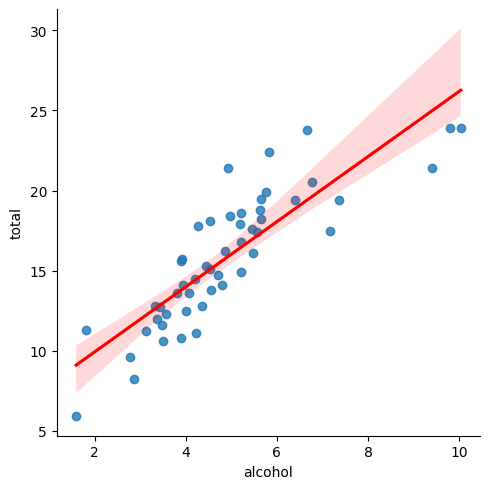

In [6]:
# Linear model Viz 
# 0.85 Correlation between alcohol and total
sns.lmplot(x='alcohol', y='total',
           line_kws={"color": "red"}, 
           data=df);

In [7]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

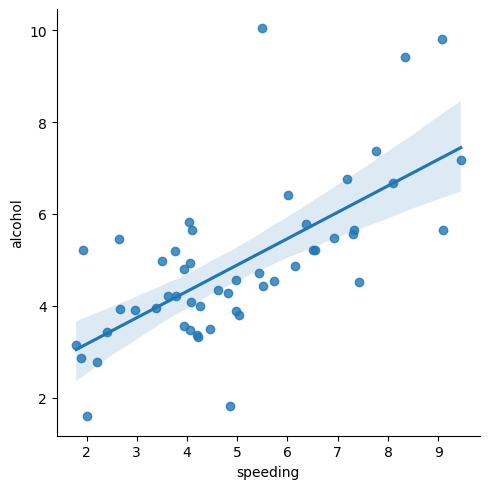

In [8]:
sns.lmplot(x='speeding',y='alcohol',data=df)

# **Robust Linear Regression**

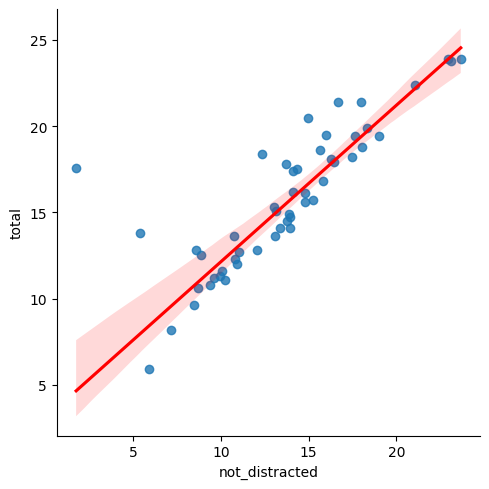

In [11]:
# Robust Linear model Viz
# For Data with Outliers
# 0.82 Correlation between not_distracted and total

sns.lmplot(x='not_distracted', y='total',
           robust=True,
           line_kws={"color": "red"}, data=df);

# **Polynomial Regression**

In [28]:
# prompt: create a dataset with polynomial order 3 with 300 observations, 2 variables

# Set a seed for reproducibility
np.random.seed(0)

# Number of observations and variables
n_observations = 300
n_variables = 1

# Generate random data
X = np.random.rand(n_observations, n_variables).flatten()

# Create a target variable (y) with a polynomial relationship to X
y = 2*X**3 - X**2 + 0.5*X * X + np.random.randn(n_observations)

# Create a Pandas DataFrame
df02 = pd.DataFrame({'X': X, 'y': y.flatten()})

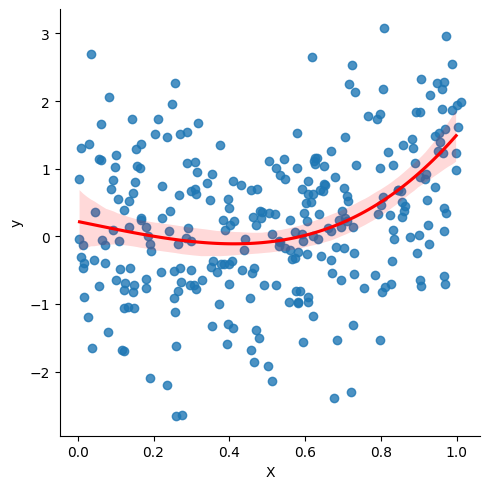

In [31]:
# Polynomial Linear Model
sns.lmplot(data=df02,
           x='X', y='y', 
           order=3, # Polynomial order
           line_kws={'color':'red'}, 
           x_jitter=0.04 # To separate the points
           )

# **Logistic Regression**

In [37]:
# Load data
df03 = sns.load_dataset('exercise', index_col='Unnamed: 0')
df03['diet'] = df03.diet.map({'low fat': 1, 'no fat': 0})
df03['time'] = df03['time'].map({'1 min':1, '15 min':15, '30 min':30}).astype('int')
df03.head(3)

,id,diet,pulse,time,kind
0,1,1,85,1,rest
1,1,1,85,15,rest
2,1,1,88,30,rest


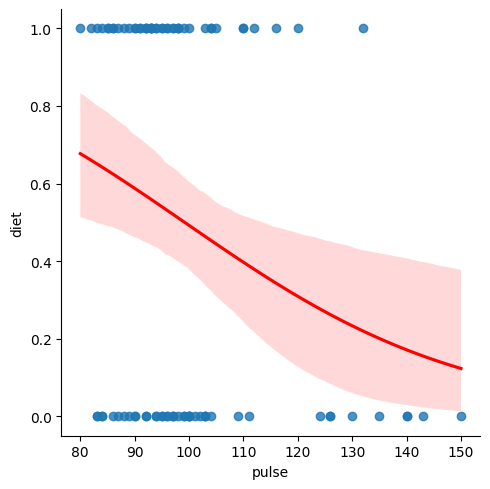

In [38]:
# Logistic Regression lmplot
sns.lmplot(data=df03,
           x='pulse', y='diet', 
           logistic=True, 
           line_kws={'color':'red'});

# **Lowess Smoothing**

LoWeSS: LOcally Weighted Scatterplot Smoothing

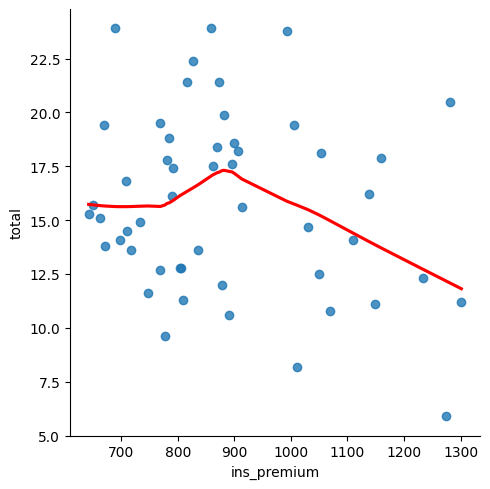

In [41]:
# Lowess smoother
sns.lmplot(data=df,
           x="ins_premium", y="total",
           lowess=True,
           line_kws={'color':'red'});

# **Residual Plot**

<Axes: xlabel='alcohol', ylabel='total'>

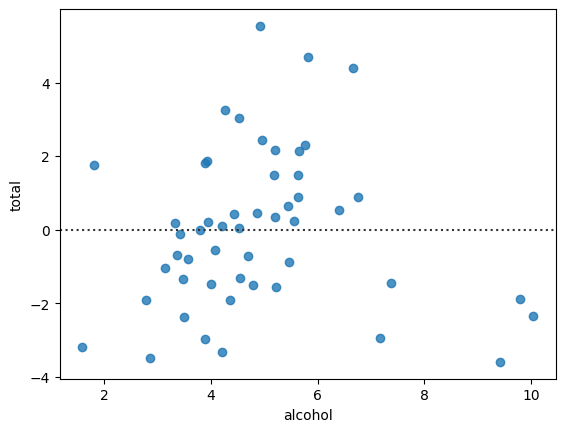

In [42]:
#Residual plot
sns.residplot(data=df,
              x="alcohol", y="total")

# **Reggression By Group**

In [43]:
df04 = sns.load_dataset('tips')

print(df04.shape)
df04.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


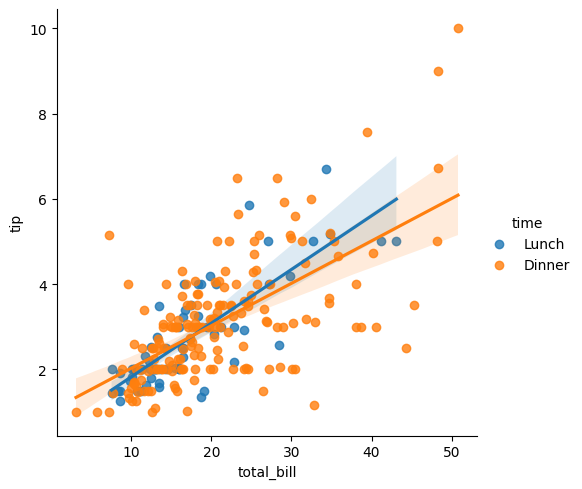

In [45]:
# Regression of Tips by hue=size
sns.lmplot(data=df04,
           x='total_bill', y='tip', 
           hue='time');

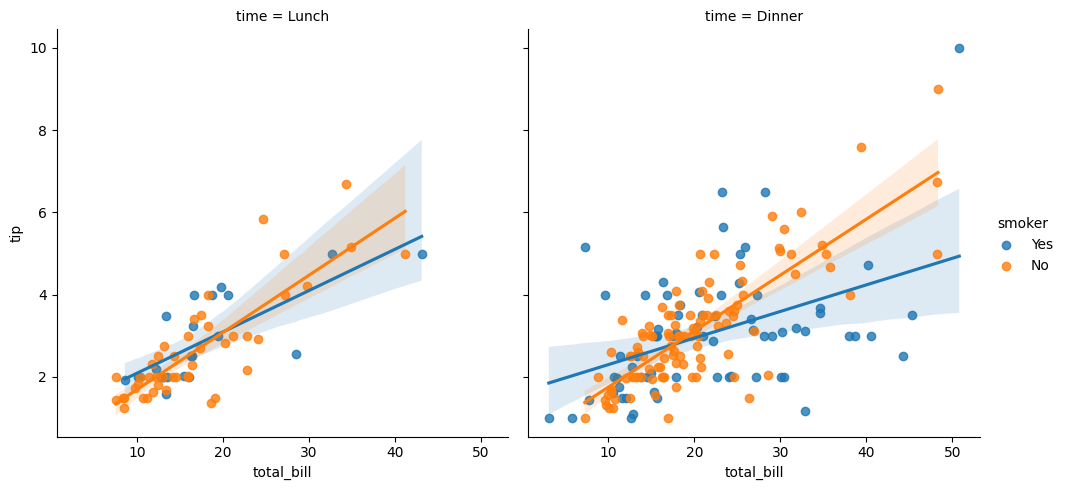

In [ ]:
# Split the data into two subsets based on the "time" column
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=df04);

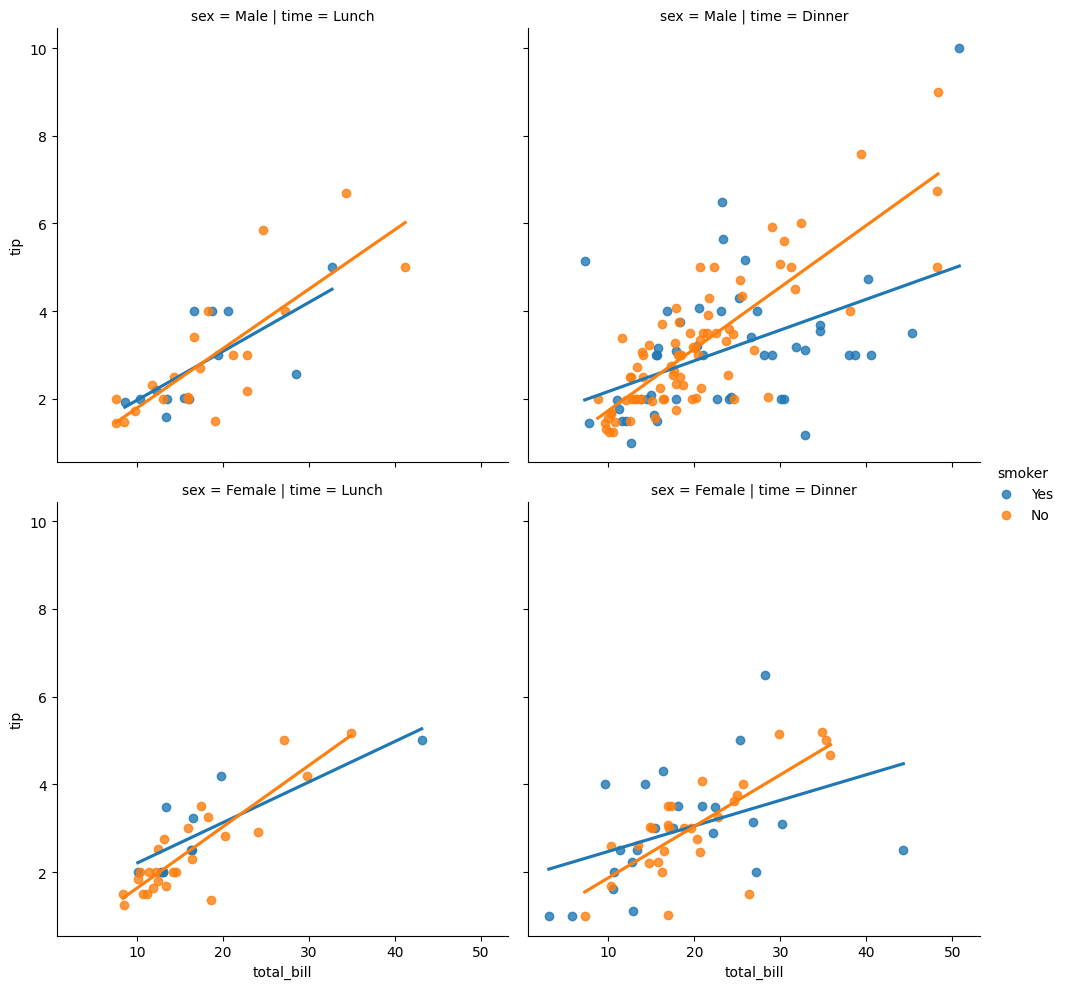

In [49]:
# Split by rows and columns
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=df04, ci=None);

# **References**

- https://towardsdatascience.com/visualizing-regression-models-with-seaborn-3bed62b10bb4
- https://seaborn.pydata.org/tutorial/regression.html